In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.rcParams.update({'font.size': 12, 'font.style': 'normal', 'font.family':'palatino'})


Websites used to choose which ones to use:
- https://www.investopedia.com/tech/most-important-cryptocurrencies-other-than-bitcoin/
- https://www.plus500.com/Trading/CryptoCurrencies/What-are-the-Most-Traded-Cryptocurrencies~2#:~:text=Bitcoin%20is%20still%20by%20far,rest%20of%20the%20crypto%20market.

In [2]:
import investpy

BTC = investpy.crypto.get_crypto_historical_data("bitcoin",  '14/03/2016', '01/05/2021', as_json=False, order='ascending', interval='Daily').reset_index()
ETH = investpy.crypto.get_crypto_historical_data("ethereum",  '14/03/2016', '01/05/2021', as_json=False, order='ascending', interval='Daily').reset_index()

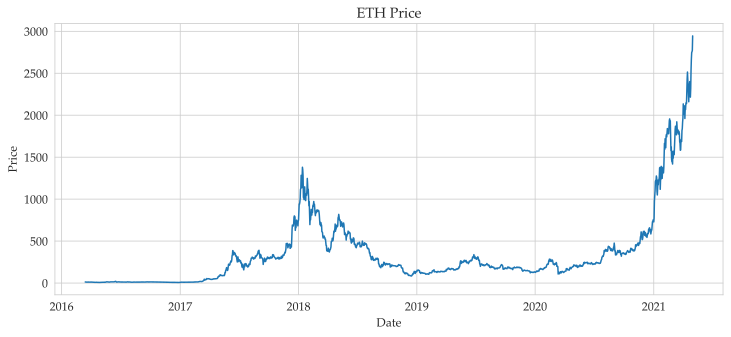

In [3]:
def plot_prices(data,name):
    fig, ax = plt.subplots(figsize=(12,5))
    
    title = f'{name} Price'
    plt.plot(data['Date'], data['Close'])
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(title)
plot_prices(ETH,"ETH")

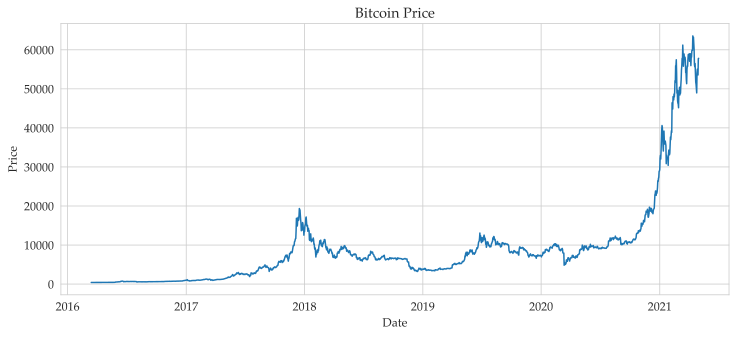

In [4]:
plot_prices(BTC,"Bitcoin")

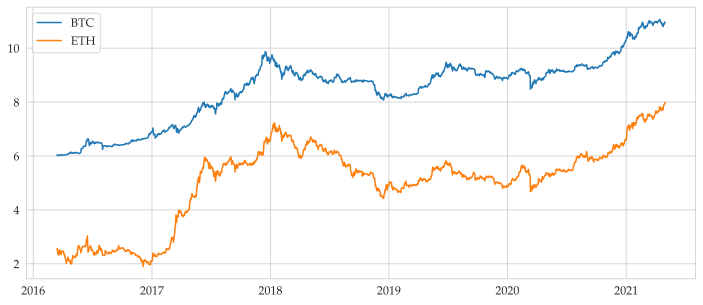

In [5]:
fig, ax = plt.subplots(figsize=(12,5))

ax.tick_params(axis='x')
ax.tick_params(axis='y')
title = 'Log Price of both stocks'
plt.plot(BTC['Date'], np.log(BTC['Close']), label='BTC')
plt.plot(ETH['Date'], np.log(ETH['Close']), label='ETH')

plt.legend()
plt.savefig(title, dpi=300)
plt.show()

In [6]:
BTC['Daily Return'] = BTC['Close'].pct_change()
ETH['Daily Return'] = ETH['Close'].pct_change()

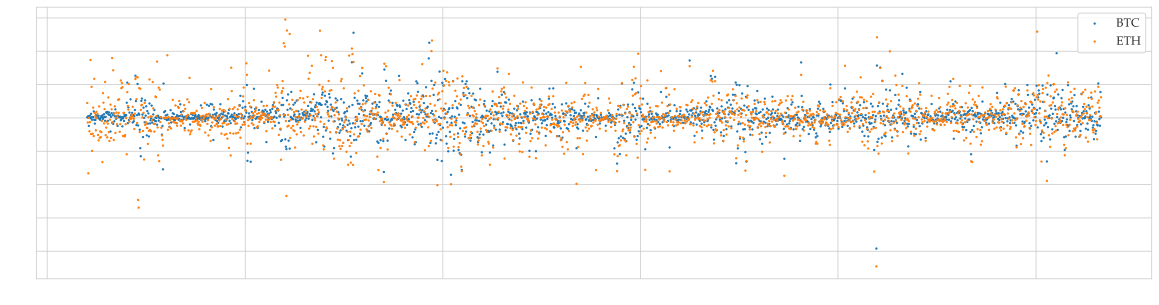

In [7]:
fig, ax = plt.subplots(figsize=(20,5))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
title = 'Percentage difference of both stock'
plt.scatter(BTC['Date'], BTC['Daily Return'], label='BTC', s=2)
plt.scatter(ETH['Date'], ETH['Daily Return'], label='ETH', s=2)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title(title, color='white')
plt.legend()
plt.savefig(title, dpi=300)
plt.show()

In [51]:
merged_btc_etc = pd.merge(BTC[["Date","Close"]],ETH[["Date","Close"]],how = "left", on = "Date").iloc[1:].reset_index(drop = True).rename({"Close_x": "Bitcoin",
                                                                                                                                          "Close_y" : "Ethereum"},axis = 1)
merged_btc_etc

,Date,Bitcoin,Ethereum
0,2016-03-15,415.1,13.06
1,2016-03-16,415.9,12.88
2,2016-03-17,418.2,10.74
3,2016-03-18,408.2,10.74
4,2016-03-19,408.7,10.31
...,...,...,...
1869,2021-04-27,55036.5,2665.24
1870,2021-04-28,54841.4,2746.54
1871,2021-04-29,53560.8,2757.36
1872,2021-04-30,57720.3,2772.78


In [52]:
for column in merged_btc_etc[["Bitcoin","Ethereum"]]:
    merged_btc_etc[f"{column} log returns"] = np.log(merged_btc_etc[column]) - np.log(merged_btc_etc[column].shift(1))

In [53]:
first_crash = merged_btc_etc.loc[merged_btc_etc["Date"].dt.year <2019]

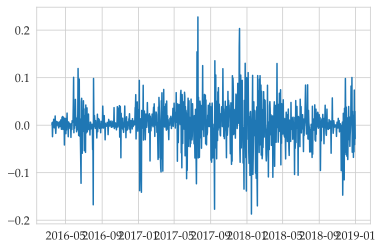

In [54]:

plt.plot(first_crash["Date"],first_crash["Bitcoin log returns"])

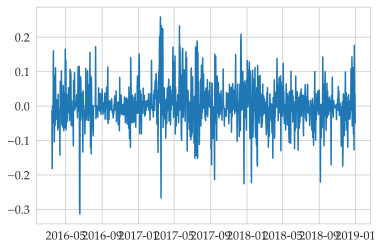

In [55]:
plt.plot(first_crash["Date"],first_crash["Ethereum log returns"])

In [56]:
# Creating bins for Transfer Entropy

In [57]:
merged_btc_etc["BTC_lag"] = merged_btc_etc["Bitcoin log returns"].shift(1)
merged_btc_etc["ETH_lag"] = merged_btc_etc["Ethereum log returns"].shift(1)

In [58]:
merged_btc_etc = merged_btc_etc.iloc[2:].reset_index(drop = True)

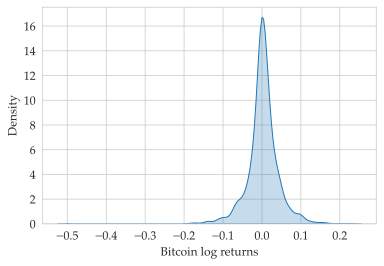

In [59]:
sns.kdeplot(merged_btc_etc["Bitcoin log returns"],shade = True)

In [72]:
bins = np.arange(merged_btc_etc[["BTC_lag","ETH_lag"]].values.min(),merged_btc_etc[["BTC_lag","ETH_lag"]].values.max(),0.1)
bins_labels = np.arange(len(bins))
bins_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [73]:
merged_btc_etc

,Date,Bitcoin,Ethereum,Bitcoin log returns,Ethereum log returns,BTC_lag,ETH_lag
0,2016-03-17,418.2,10.74,0.005515,-0.181701,0.001925,-0.013878
1,2016-03-18,408.2,10.74,-0.024203,0.000000,0.005515,-0.181701
2,2016-03-19,408.7,10.31,0.001224,-0.040861,-0.024203,0.000000
3,2016-03-20,411.5,10.18,0.006828,-0.012689,0.001224,-0.040861
4,2016-03-21,411.1,11.95,-0.000973,0.160306,0.006828,-0.012689
...,...,...,...,...,...,...,...
1867,2021-04-27,55036.5,2665.24,0.018633,0.050842,0.098286,0.089403
1868,2021-04-28,54841.4,2746.54,-0.003551,0.030048,0.018633,0.050842
1869,2021-04-29,53560.8,2757.36,-0.023628,0.003932,-0.003551,0.030048
1870,2021-04-30,57720.3,2772.78,0.074791,0.005577,-0.023628,0.003932


In [74]:
def binner(x, bins,bins_labels):
    out = np.zeros(len(x))
    for i in range(len(x)): 
        out[i] = np.where(x[i]-bins >= 0)[0][-1]
    
    return pd.Series(out,index = ["BTC_n1","ETH_n1","BTC_n","ETH_n"])

for_te = merged_btc_etc[["Bitcoin log returns","Ethereum log returns","BTC_lag","ETH_lag"]].apply(lambda x: binner(x,bins,bins_labels),axis = 1)
pBTC_n = (for_te.groupby("BTC_n").size()/len(for_te)).reset_index().rename({0: "pBTC_n"},axis = 1)
pETH_n = (for_te.groupby("ETH_n").size()/len(for_te)).reset_index().rename({0: "pETH_n"},axis = 1)



In [75]:
pBTC_n1 = (for_te.groupby(["BTC_n1","BTC_n"]).size()/len(for_te)).reset_index().rename({0: "pBTC_n1"},axis = 1)
pETH_n1 = (for_te.groupby(["ETH_n1","ETH_n"]).size()/len(for_te)).reset_index().rename({0: "pETH_n1"},axis = 1)

pETH_BTC_n = (for_te.groupby(["BTC_n","ETH_n"]).size()/len(for_te)).reset_index().rename({0: "pETH_BTC_n"},axis = 1)

pETH_BTC_n1 = (for_te.groupby(["BTC_n1","ETH_n","BTC_n"]).size()/len(for_te)).reset_index().rename({0: "pETH_BTC_n1"},axis = 1)

pBTC_ETH_n1 = (for_te.groupby(["ETH_n1","ETH_n","BTC_n"]).size()/len(for_te)).reset_index().rename({0: "pBTC_ETH_n1"},axis = 1)


merged = for_te.merge(
    pBTC_n,on = "BTC_n",how = "left").merge(
    pETH_n,on = "ETH_n",how = "left").merge(
    pBTC_n1,on = ["BTC_n1","BTC_n"],how = "left").merge(
    pETH_n1,on = ["ETH_n1","ETH_n"],how = "left").merge(
    pETH_BTC_n,on = ["BTC_n","ETH_n"],how = "left").merge(
    pETH_BTC_n1,on = ["BTC_n1","ETH_n","BTC_n"],how = "left").merge(
    pBTC_ETH_n1,on = ["ETH_n1","ETH_n","BTC_n"],how = "left")
merged



,BTC_n1,ETH_n1,BTC_n,ETH_n,pBTC_n,pETH_n,pBTC_n1,pETH_n1,pETH_BTC_n,pETH_BTC_n1,pBTC_ETH_n1
0,5.0,4.0,5.0,5.0,0.620726,0.573718,0.392628,0.024573,0.461538,0.284188,0.019231
1,5.0,5.0,5.0,4.0,0.620726,0.035256,0.392628,0.012821,0.022436,0.011752,0.008013
2,5.0,5.0,5.0,5.0,0.620726,0.573718,0.392628,0.319444,0.461538,0.284188,0.253739
3,5.0,5.0,5.0,5.0,0.620726,0.573718,0.392628,0.319444,0.461538,0.284188,0.253739
4,5.0,7.0,5.0,5.0,0.620726,0.573718,0.392628,0.012286,0.461538,0.284188,0.009615
...,...,...,...,...,...,...,...,...,...,...,...
1867,6.0,6.0,6.0,6.0,0.345620,0.352030,0.122863,0.111645,0.220620,0.075855,0.069444
1868,5.0,6.0,6.0,6.0,0.345620,0.352030,0.213141,0.111645,0.220620,0.139423,0.069444
1869,5.0,5.0,5.0,6.0,0.620726,0.352030,0.392628,0.216880,0.126068,0.090278,0.079594
1870,6.0,5.0,5.0,5.0,0.620726,0.573718,0.207799,0.319444,0.461538,0.162393,0.253739


In [76]:
TE_btc_eth = np.sum(merged["pBTC_ETH_n1"]*np.log2((merged["pBTC_ETH_n1"]*merged["pETH_n"])/(merged["pETH_n1"]*merged["pETH_BTC_n"])))
TE_eth_btc = np.sum(merged["pETH_BTC_n1"]*np.log2((merged["pETH_BTC_n1"]*merged["pBTC_n"])/(merged["pBTC_n1"]*merged["pETH_BTC_n"])))

In [77]:
print(f"Transfer Entropy of Bitcoin on Ethereum: {TE_btc_eth}")

print(f"Transfer Entropy of Ethereum on Bitcoin: {TE_eth_btc}")

Transfer Entropy of Bitcoin on Ethereum: 0.14685819150949184
Transfer Entropy of Ethereum on Bitcoin: 0.2316446679708485


In [ ]:
merged_btc_etc.to_csv("Data/Historical_prices.csv")